<a href="https://colab.research.google.com/github/adnan855570/Numpy/blob/main/Advanced_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Numpy array vs Python lists**

## **Speed**

### 1. Lists

In [2]:
a = [i for i in range(10000000)]
b = [i for i in range(10000000)]

c = []

import time

start = time.time()
for i in range(len(a)):
  c.append(a[i] + b[i])
print(time.time() - start)

3.5949952602386475


### 2. Numpy

In [3]:
import numpy as np

a = np.arange(10000000)
b = np.arange(10000000)
start = time.time()
c = a + b
print(time.time() - start)

0.24792957305908203


## **Memory**

In [4]:
a = [i for i in range(10000000)]
import sys

sys.getsizeof(a)

89095160

In [5]:
a = np.arange(10000000)

sys.getsizeof(a)

80000112

In [6]:
a = np.arange(10000000, dtype=np.int32)

sys.getsizeof(a)

40000112

## **Conveniance**

## Numpy is better than regular python

# **Advanced Indexing**

## **Normal Indexing and Slicing**

In [7]:
a = np.arange(24).reshape(6,4)

a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [8]:
a[1,2]

np.int64(6)

In [9]:
a[1:3,1:3]

array([[ 5,  6],
       [ 9, 10]])

## **Fancy Indexing**

In [10]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [11]:
a[[0,2,3,5]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [20, 21, 22, 23]])

In [12]:
a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

## **Boolean Indexing**

In [13]:
b = np.random.randint(1,100,24).reshape(6,4)
b

array([[80, 40, 59,  2],
       [80, 26, 59, 14],
       [42, 29, 98, 36],
       [97, 56, 22,  1],
       [94, 42, 53,  4],
       [98,  1, 47, 11]])

In [14]:
# find numbers greater than 30

b[b > 30]

array([80, 40, 59, 80, 59, 42, 98, 36, 97, 56, 94, 42, 53, 98, 47])

In [15]:
# find even numbers

b % 2 == 0

array([[ True,  True, False,  True],
       [ True,  True, False,  True],
       [ True, False,  True,  True],
       [False,  True,  True, False],
       [ True,  True, False,  True],
       [ True, False, False, False]])

In [16]:
b[b % 2 == 0]

array([80, 40,  2, 80, 26, 14, 42, 98, 36, 56, 22, 94, 42,  4, 98])

In [17]:
# find the number greater than 30 and are even

b[(b > 30) & (b % 2 == 0)]

array([80, 40, 80, 42, 98, 36, 56, 94, 42, 98])

In [18]:
# find the number not divisible by 7

b[~(b % 7 == 0)]

array([80, 40, 59,  2, 80, 26, 59, 29, 36, 97, 22,  1, 94, 53,  4,  1, 47,
       11])

# **Broadcasting**

### The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

### The smaller array is “broadcast” across the larger array so that they have compatible shapes.

## Same Shape

In [19]:
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)

print(a)


[[0 1 2]
 [3 4 5]]


In [20]:
print(b)

[[ 6  7  8]
 [ 9 10 11]]


In [21]:
print(a + b)

[[ 6  8 10]
 [12 14 16]]


## diffferent Shape

In [22]:
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a + b)

[[0 2 4]
 [3 5 7]]


# **Broadcasting Rules**

1. Make the two arrays have the same number of dimensions.

If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.

2. Make each dimension of the two arrays the same size.

If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

In [23]:
# Examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]


In [24]:
print(a + b)

[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [25]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print(a + b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [26]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [27]:
a = np.arange(3).reshape(1,3)
b = np.arange(4).reshape(4,1)

print(a)
print(b)

print(a + b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


In [28]:
a = np.array([1])
b = np.arange(4).reshape(2,2)

print(a)
print(b)
print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [29]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [30]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

# **Working with mathematical formulas**

## **Sigmoid**

In [31]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
np.sum(a)

np.int64(45)

In [33]:
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [34]:
def sigmoid(array):
  return 1/(1 + np.exp(-(array)))

  a = np.arange(10)
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

## **Mean Square Error**

In [35]:
actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

print(actual)

[16 46  8 10 48 45 33 16 46 49 48 11 42  6 20 21 48 28 46 19 15 16 43 25
 49]


In [36]:
print(predicted)

[13 43  3 24 33 31 24 47 20 10 16 48 26 31 30  8 26  8 31 24 23 12 25 32
 42]


In [37]:
def mse(actual, predicted):
  return np.mean((actual - predicted)** 2)

mse(actual, predicted)

np.float64(363.12)

## **Binary Category Entrophy**

# **Working with Missing valuese**

In [38]:
a = np.array([1,2,3,4,np.nan,6])

a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [39]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

# **Plotting Graphs**

## **Plotting a 2D graph**

In [40]:
x = np.linspace(-10,10,20)
x

array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ])

In [41]:
y = x
y

array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ])

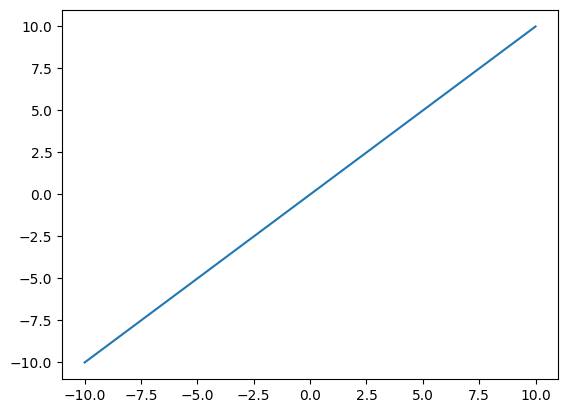

In [42]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.show()

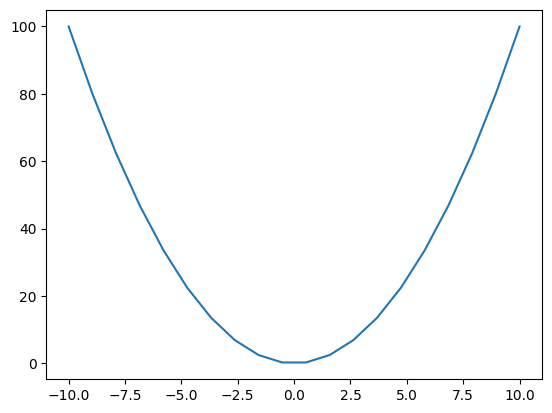

In [43]:
# y = x ^ 2

x = np.linspace(-10,10,20)
y = x ** 2

plt.plot(x,y)

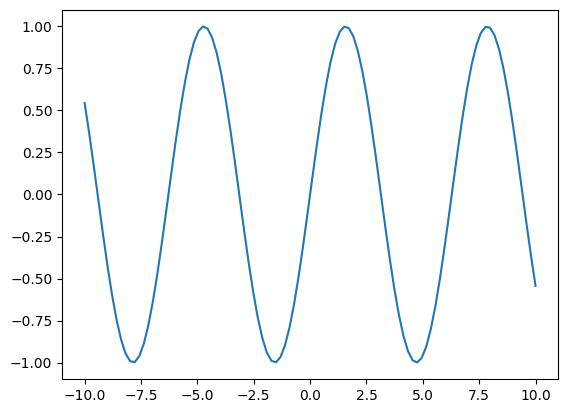

In [44]:
# y = sin (x)

x = np.linspace(-10,10,100)
y = np.sin(x)

plt.plot(x,y)

/tmp/ipython-input-3115649012.py:4: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


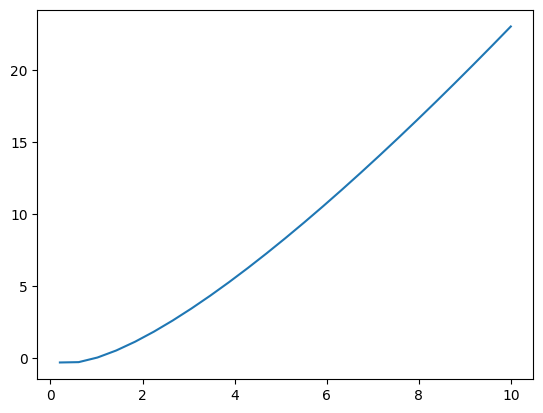

In [45]:
# y = x log(x)

x = np.linspace(-10,10,50)
y = x * np.log(x)

plt.plot(x,y)

In [46]:
# plottig scatter graph



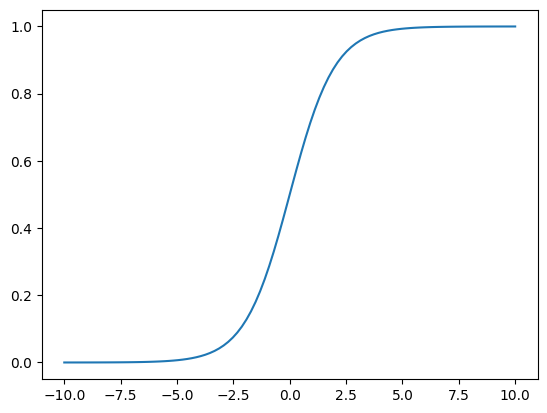

In [47]:
# sigmoid

x = np.linspace(-10,10,100)
y = 1 / (1 + np.exp(-x))

plt.plot(x,y)

# **Important functions in numpy**

## **np.sort**

### Return a sorted copy of an array.

In [48]:
import numpy as np
a = np.random.randint(1,100,25)
a

array([12, 59, 59, 75, 76, 69, 91, 52, 53,  7, 98, 62, 53, 27, 58, 96, 85,
       48, 58, 14, 44, 92, 61, 92, 35])

In [49]:
np.sort(a)

array([ 7, 12, 14, 27, 35, 44, 48, 52, 53, 53, 58, 58, 59, 59, 61, 62, 69,
       75, 76, 85, 91, 92, 92, 96, 98])

In [50]:
np.sort(a)[::-1]

array([98, 96, 92, 92, 91, 85, 76, 75, 69, 62, 61, 59, 59, 58, 58, 53, 53,
       52, 48, 44, 35, 27, 14, 12,  7])

In [51]:
b = np.random.randint(1,100,24).reshape(6,4)
b

array([[76, 54, 97, 82],
       [69, 91, 27, 89],
       [61, 14, 50, 29],
       [68,  1, 20, 40],
       [84, 78, 86, 60],
       [81, 45, 86, 96]])

In [52]:
np.sort(b)

array([[54, 76, 82, 97],
       [27, 69, 89, 91],
       [14, 29, 50, 61],
       [ 1, 20, 40, 68],
       [60, 78, 84, 86],
       [45, 81, 86, 96]])

In [53]:
np.sort(b, axis=0)

array([[61,  1, 20, 29],
       [68, 14, 27, 40],
       [69, 45, 50, 60],
       [76, 54, 86, 82],
       [81, 78, 86, 89],
       [84, 91, 97, 96]])

## **np.append**

### The numpy.append() appends values along the mentioned axis at the end of the array

In [54]:
np.append(a,200)

array([ 12,  59,  59,  75,  76,  69,  91,  52,  53,   7,  98,  62,  53,
        27,  58,  96,  85,  48,  58,  14,  44,  92,  61,  92,  35, 200])

In [55]:
b

array([[76, 54, 97, 82],
       [69, 91, 27, 89],
       [61, 14, 50, 29],
       [68,  1, 20, 40],
       [84, 78, 86, 60],
       [81, 45, 86, 96]])

In [58]:
np.append(b, np.ones((b.shape[0],1)),axis=1)

array([[76., 54., 97., 82.,  1.],
       [69., 91., 27., 89.,  1.],
       [61., 14., 50., 29.,  1.],
       [68.,  1., 20., 40.,  1.],
       [84., 78., 86., 60.,  1.],
       [81., 45., 86., 96.,  1.]])

In [60]:
np.append(b, np.random.random((b.shape[0],1)),axis=1)

array([[76.        , 54.        , 97.        , 82.        ,  0.3996199 ],
       [69.        , 91.        , 27.        , 89.        ,  0.7605501 ],
       [61.        , 14.        , 50.        , 29.        ,  0.54577953],
       [68.        ,  1.        , 20.        , 40.        ,  0.42205868],
       [84.        , 78.        , 86.        , 60.        ,  0.47885996],
       [81.        , 45.        , 86.        , 96.        ,  0.52325086]])

## **np.concatenate**

### numpy.concatenate() function concatenate a sequence of arrays along an existing axis.

In [61]:
c = np.arange(6).reshape(2,3)
d = np.arange(6,12).reshape(2,3)

print(c)
print(d)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]


In [62]:
np.concatenate((c,d), axis=0)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [63]:
np.concatenate((c,d), axis=1)

array([[ 0,  1,  2,  6,  7,  8],
       [ 3,  4,  5,  9, 10, 11]])

## **np.unique**

### With the help of np.unique() method, we can get the unique values from an array given as parameter in np.unique() method.

In [64]:
e = np.array([1,1,2,2,3,3,4,4,5,5,6,6])
e

array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6])

In [65]:
np.unique(e)

array([1, 2, 3, 4, 5, 6])

## **np.expand_dims**

With the help of Numpy.expand_dims() method, we can get the expanded dimensions of an array

In [66]:
a

array([12, 59, 59, 75, 76, 69, 91, 52, 53,  7, 98, 62, 53, 27, 58, 96, 85,
       48, 58, 14, 44, 92, 61, 92, 35])

In [69]:
a.shape

(25,)

In [71]:
np.expand_dims(a, axis=0)

array([[12, 59, 59, 75, 76, 69, 91, 52, 53,  7, 98, 62, 53, 27, 58, 96,
        85, 48, 58, 14, 44, 92, 61, 92, 35]])

In [72]:
np.expand_dims(a, axis=0).shape

(1, 25)

In [73]:
np.expand_dims(a, axis=1)

array([[12],
       [59],
       [59],
       [75],
       [76],
       [69],
       [91],
       [52],
       [53],
       [ 7],
       [98],
       [62],
       [53],
       [27],
       [58],
       [96],
       [85],
       [48],
       [58],
       [14],
       [44],
       [92],
       [61],
       [92],
       [35]])

In [74]:
np.expand_dims(a, axis=1).shape

(25, 1)

## **np.where**

### The numpy.where() function returns the indices of elements in an input array where the given condition is satisfied.

In [75]:
a

array([12, 59, 59, 75, 76, 69, 91, 52, 53,  7, 98, 62, 53, 27, 58, 96, 85,
       48, 58, 14, 44, 92, 61, 92, 35])

In [77]:
# find the indices with value greater than 50

np.where(a > 50)

(array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 14, 15, 16, 18, 21, 22,
        23]),)

In [78]:
# replace all values > 50 with 0
np.where(a > 50, 0, a)

array([12,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  0, 27,  0,  0,  0,
       48,  0, 14, 44,  0,  0,  0, 35])

In [79]:
np.where(a%2 == 0,0,a)

array([ 0, 59, 59, 75,  0, 69, 91,  0, 53,  7,  0,  0, 53, 27,  0,  0, 85,
        0,  0,  0,  0,  0, 61,  0, 35])

## **np.argmax**

### The numpy.argmax() function returns indices of the max element of the array in a particular axis.

In [80]:
a

array([12, 59, 59, 75, 76, 69, 91, 52, 53,  7, 98, 62, 53, 27, 58, 96, 85,
       48, 58, 14, 44, 92, 61, 92, 35])

In [81]:
np.argmax(a)

np.int64(10)

In [82]:
b

array([[76, 54, 97, 82],
       [69, 91, 27, 89],
       [61, 14, 50, 29],
       [68,  1, 20, 40],
       [84, 78, 86, 60],
       [81, 45, 86, 96]])

In [83]:
np.argmax(b, axis=0)

array([4, 1, 0, 5])

In [84]:
np.argmax(b, axis=1)

array([2, 1, 0, 0, 2, 3])

## **np.argmin**

In [85]:
a

array([12, 59, 59, 75, 76, 69, 91, 52, 53,  7, 98, 62, 53, 27, 58, 96, 85,
       48, 58, 14, 44, 92, 61, 92, 35])

In [86]:
np.argmin(a)

np.int64(9)

## **np.cumsum**

### numpy.cumsum() function is used when we want to compute the cumulative sum of array elements over a given axis.

In [87]:
a

array([12, 59, 59, 75, 76, 69, 91, 52, 53,  7, 98, 62, 53, 27, 58, 96, 85,
       48, 58, 14, 44, 92, 61, 92, 35])

In [89]:
np.cumsum(a)

array([  12,   71,  130,  205,  281,  350,  441,  493,  546,  553,  651,
        713,  766,  793,  851,  947, 1032, 1080, 1138, 1152, 1196, 1288,
       1349, 1441, 1476])

In [90]:
b

array([[76, 54, 97, 82],
       [69, 91, 27, 89],
       [61, 14, 50, 29],
       [68,  1, 20, 40],
       [84, 78, 86, 60],
       [81, 45, 86, 96]])

In [91]:
np.cumsum(b)

array([  76,  130,  227,  309,  378,  469,  496,  585,  646,  660,  710,
        739,  807,  808,  828,  868,  952, 1030, 1116, 1176, 1257, 1302,
       1388, 1484])

In [92]:
np.cumsum(b, axis=0)

array([[ 76,  54,  97,  82],
       [145, 145, 124, 171],
       [206, 159, 174, 200],
       [274, 160, 194, 240],
       [358, 238, 280, 300],
       [439, 283, 366, 396]])

In [93]:
np.cumsum(b, axis=1)

array([[ 76, 130, 227, 309],
       [ 69, 160, 187, 276],
       [ 61,  75, 125, 154],
       [ 68,  69,  89, 129],
       [ 84, 162, 248, 308],
       [ 81, 126, 212, 308]])

## **np.cumprod**

In [94]:
a

array([12, 59, 59, 75, 76, 69, 91, 52, 53,  7, 98, 62, 53, 27, 58, 96, 85,
       48, 58, 14, 44, 92, 61, 92, 35])

In [95]:
np.cumprod(a)

array([                  12,                  708,                41772,
                    3132900,            238100400,          16428927600,
              1495032411600,       77741685403200,     4120309326369600,
          28842165284587200,  2826532197889545600, -9222444467943688960,
       -9174210884567172864, -7896020925089496320,  3199388187548003840,
       -6453383248454008832,  4864746092695797760, -6299860508825878528,
        3542971962290077696, -5738624749067567104,  5754928072960770048,
       -5502195425186152448, -3592527609583370240,  1528853245101867008,
       -1830368642563309568])

## **np.percentile**

### numpy.percentile()function used to compute the nth percentile of the given data (array elements) along the specified axis.

In [96]:
a

array([12, 59, 59, 75, 76, 69, 91, 52, 53,  7, 98, 62, 53, 27, 58, 96, 85,
       48, 58, 14, 44, 92, 61, 92, 35])

In [97]:
np.percentile(a, 100)

np.float64(98.0)

In [98]:
np.percentile(a, 0)

np.float64(7.0)

In [99]:
np.percentile(a, 50)

np.float64(59.0)

## **np.histogram**

### Numpy has a built-in numpy.histogram() function which represents the frequency of data distribution in the graphical form.

In [100]:
a

array([12, 59, 59, 75, 76, 69, 91, 52, 53,  7, 98, 62, 53, 27, 58, 96, 85,
       48, 58, 14, 44, 92, 61, 92, 35])

In [101]:
np.histogram(a, bins=[0,20,50,100])

(array([ 3,  4, 18]), array([  0,  20,  50, 100]))

## **np.corrcoef**

### Return Pearson product-moment correlation coefficients.

In [102]:
salary = np.array([20000,40000,25000,35000,60000])
experience = np.array([1,3,2,4,2])

np.corrcoef(salary, experience)

array([[1.        , 0.25344572],
       [0.25344572, 1.        ]])

## **np.isin**

### With the help of numpy.isin() method, we can see that one array having values are checked in a different numpy array having different elements with different sizes.

In [103]:
a

array([12, 59, 59, 75, 76, 69, 91, 52, 53,  7, 98, 62, 53, 27, 58, 96, 85,
       48, 58, 14, 44, 92, 61, 92, 35])

In [104]:
items = [2,5,60,59]

np.isin(a, items)

array([False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [105]:
a[np.isin(a, items)]

array([59, 59])

## **np.flip**

### The numpy.flip() function reverses the order of array elements along the specified axis, preserving the shape of the array.

In [106]:
a

array([12, 59, 59, 75, 76, 69, 91, 52, 53,  7, 98, 62, 53, 27, 58, 96, 85,
       48, 58, 14, 44, 92, 61, 92, 35])

In [108]:
np.flip(a)

array([35, 92, 61, 92, 44, 14, 58, 48, 85, 96, 58, 27, 53, 62, 98,  7, 53,
       52, 91, 69, 76, 75, 59, 59, 12])

In [109]:
b

array([[76, 54, 97, 82],
       [69, 91, 27, 89],
       [61, 14, 50, 29],
       [68,  1, 20, 40],
       [84, 78, 86, 60],
       [81, 45, 86, 96]])

In [110]:
np.flip(b)

array([[96, 86, 45, 81],
       [60, 86, 78, 84],
       [40, 20,  1, 68],
       [29, 50, 14, 61],
       [89, 27, 91, 69],
       [82, 97, 54, 76]])

In [113]:
np.flip(b, axis=0)

array([[81, 45, 86, 96],
       [84, 78, 86, 60],
       [68,  1, 20, 40],
       [61, 14, 50, 29],
       [69, 91, 27, 89],
       [76, 54, 97, 82]])

In [114]:
np.flip(b, axis=1)

array([[82, 97, 54, 76],
       [89, 27, 91, 69],
       [29, 50, 14, 61],
       [40, 20,  1, 68],
       [60, 86, 78, 84],
       [96, 86, 45, 81]])

## **np.put**

### The numpy.put() function replaces specific elements of an array with given values of p_array. Array indexed works on flattened array.

In [115]:
a

array([12, 59, 59, 75, 76, 69, 91, 52, 53,  7, 98, 62, 53, 27, 58, 96, 85,
       48, 58, 14, 44, 92, 61, 92, 35])

In [117]:
np.put(a, [0,1], [110,430])

In [118]:
a

array([110, 430,  59,  75,  76,  69,  91,  52,  53,   7,  98,  62,  53,
        27,  58,  96,  85,  48,  58,  14,  44,  92,  61,  92,  35])

## **np.delete**

### The numpy.delete() function returns a new array with the deletion of sub-arrays along with the mentioned axis.

In [119]:
a

array([110, 430,  59,  75,  76,  69,  91,  52,  53,   7,  98,  62,  53,
        27,  58,  96,  85,  48,  58,  14,  44,  92,  61,  92,  35])

In [120]:
np.delete(a, 3)

array([110, 430,  59,  76,  69,  91,  52,  53,   7,  98,  62,  53,  27,
        58,  96,  85,  48,  58,  14,  44,  92,  61,  92,  35])

In [121]:
np.delete(a, [4,5,6])

array([110, 430,  59,  75,  52,  53,   7,  98,  62,  53,  27,  58,  96,
        85,  48,  58,  14,  44,  92,  61,  92,  35])

## **Set functions**

* np.union1d
* np.intersect1d
* np.setdiff1d
* np.setxor1d
* np.in1d

In [123]:
m = np.array([1,2,3,4,5])
n = np.array([3,4,5,6,7])

np.union1d(m,n)

array([1, 2, 3, 4, 5, 6, 7])

In [124]:
np.intersect1d(m,n)

array([3, 4, 5])

In [125]:
np.setdiff1d(m,n)

array([1, 2])

In [126]:
np.setxor1d(m,n)

array([1, 2, 6, 7])

In [127]:
np.in1d(m,n)

/tmp/ipython-input-207282267.py:1: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  np.in1d(m,n)


array([False, False,  True,  True,  True])

## **np.clip**

### numpy.clip() function is used to Clip (limit) the values in an array.

In [128]:
a

array([110, 430,  59,  75,  76,  69,  91,  52,  53,   7,  98,  62,  53,
        27,  58,  96,  85,  48,  58,  14,  44,  92,  61,  92,  35])

In [129]:
np.clip(a, a_min=25, a_max=75)

array([75, 75, 59, 75, 75, 69, 75, 52, 53, 25, 75, 62, 53, 27, 58, 75, 75,
       48, 58, 25, 44, 75, 61, 75, 35])